In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 4000

In [2]:
def get_data(path):
    data = pd.read_csv(path+'.csv')
    return data

def get_columns(data):
    cols = data.columns
    return cols
    
def drop_columns(data,columns):
    new_data = data.copy()
    new_data.drop(labels=columns, axis=1, inplace=True)
    return new_data

In [3]:
data = get_data('ML_df') 
cols = get_columns(data)
cols_drop = ['Unnamed: 0', 'App', 'Genres', 'Last Updated', 'numeric_date']
new_data = drop_columns(data, cols_drop)

In [4]:
new_data.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Free,updated
0,ART_AND_DESIGN,4.1,159,19.0,10000,0.0,Everyone,1,213
1,ART_AND_DESIGN,3.9,967,14.0,500000,0.0,Everyone,1,205
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,Everyone,1,7
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,0.0,Teen,1,61
4,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,Everyone,1,49


In [5]:
new_data.describe()

,Rating,Reviews,Size,Installs,Price,Free,updated
count,9356.000000,9.356000e+03,9356.000000,9.356000e+03,9356.00000,9356.000000,9356.000000
mean,4.191813,5.145878e+05,21.519921,1.791619e+07,0.96169,0.931060,251.307717
std,0.515329,3.145679e+06,21.917928,9.128517e+07,15.82501,0.253365,395.633155
min,1.000000,1.000000e+00,0.008500,1.000000e+00,0.00000,0.000000,0.000000
25%,4.000000,1.860000e+02,6.100000,1.000000e+04,0.00000,1.000000,15.000000
50%,4.300000,5.941500e+03,14.000000,5.000000e+05,0.00000,1.000000,68.000000
75%,4.500000,8.168775e+04,29.000000,5.000000e+06,0.00000,1.000000,303.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.00000,1.000000,3001.000000


Text(0.5, 1.0, 'Rating vs Price')

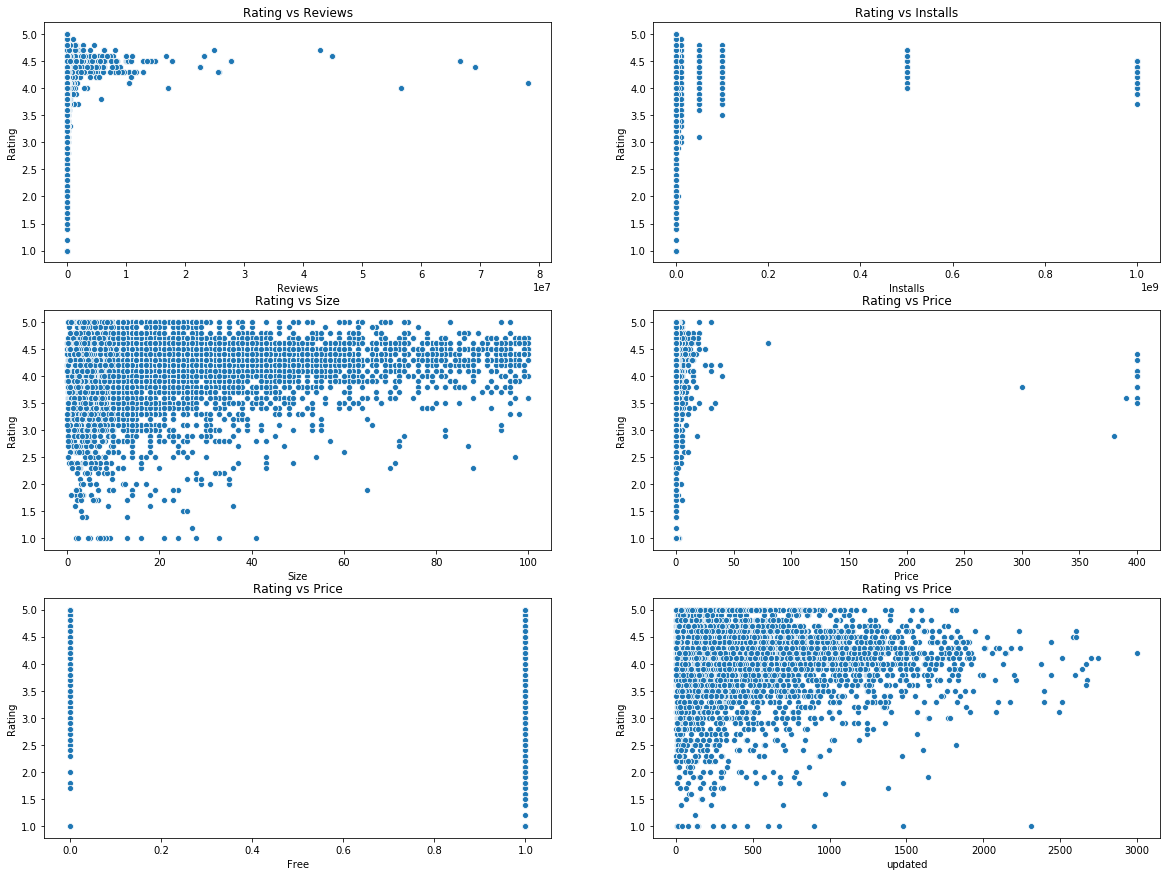

In [10]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(20,15)

sns.scatterplot(x='Reviews', y='Rating', data=new_data, ax=ax[0][0])
ax[0][0].set_title('Rating vs Reviews')

sns.scatterplot(x='Installs', y='Rating', data=new_data, ax=ax[0][1])
ax[0][1].set_title('Rating vs Installs')

sns.scatterplot(x='Size', y='Rating', data=new_data, ax=ax[1][0])
ax[1][0].set_title('Rating vs Size')

sns.scatterplot(x='Price', y='Rating', data=new_data, ax=ax[1][1])
ax[1][1].set_title('Rating vs Price')

sns.scatterplot(x='Free', y='Rating', data=new_data, ax=ax[2][0])
ax[2][0].set_title('Rating vs Price')

sns.scatterplot(x='updated', y='Rating', data=new_data, ax=ax[2][1])
ax[2][1].set_title('Rating vs Price')

### According to the scatter plots there are some outliers in data. Outliers may cause some problems when applying Machine Learning thus, I'll remove them

In [14]:
new_data = new_data.loc[(new_data['Reviews'] < 10000000) & (new_data['Price'] <= 20) & (new_data['updated'] < 2000) &
                        (new_data['Rating'] > 1.5) & (new_data['Installs'] < 200000000)]

Text(0.5, 1.0, 'Rating vs Price')

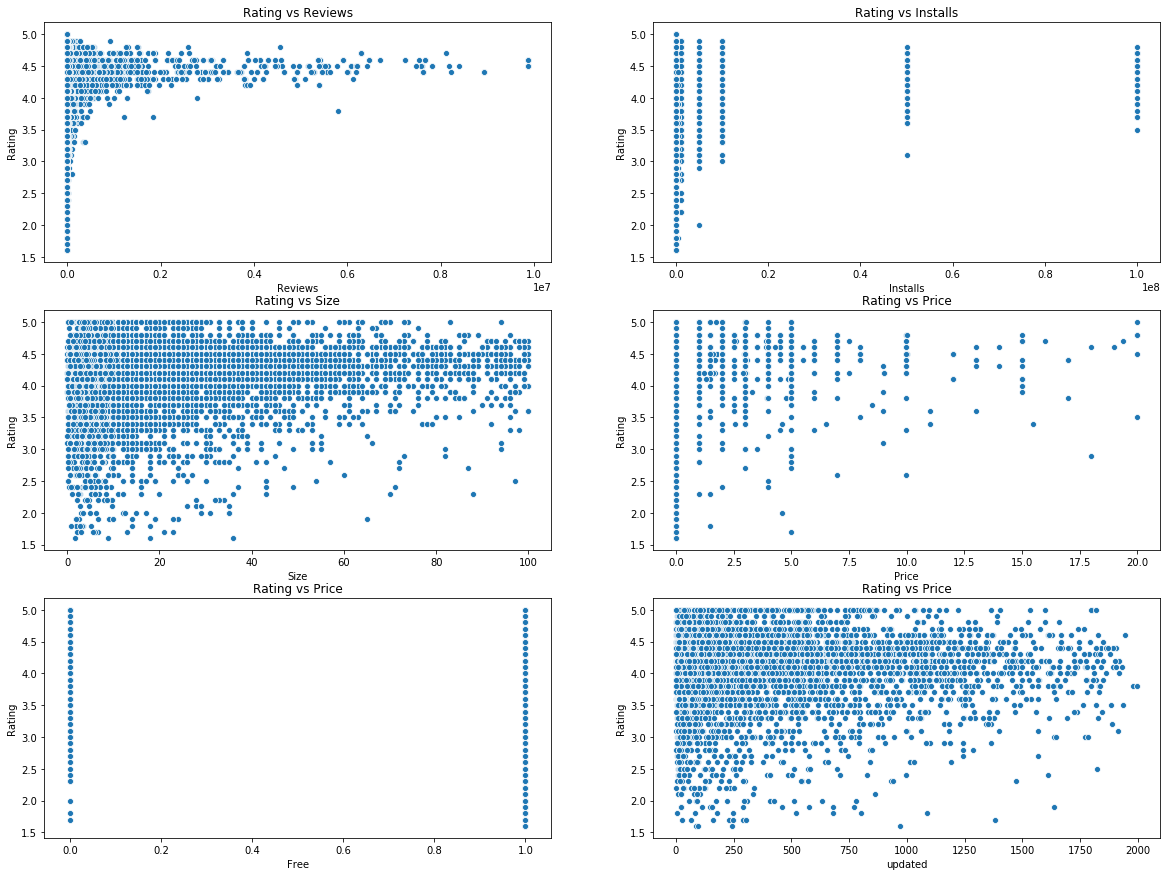

In [15]:
fig, ax = plt.subplots(3,2)
fig.set_size_inches(20,15)

sns.scatterplot(x='Reviews', y='Rating', data=new_data, ax=ax[0][0])
ax[0][0].set_title('Rating vs Reviews')

sns.scatterplot(x='Installs', y='Rating', data=new_data, ax=ax[0][1])
ax[0][1].set_title('Rating vs Installs')

sns.scatterplot(x='Size', y='Rating', data=new_data, ax=ax[1][0])
ax[1][0].set_title('Rating vs Size')

sns.scatterplot(x='Price', y='Rating', data=new_data, ax=ax[1][1])
ax[1][1].set_title('Rating vs Price')

sns.scatterplot(x='Free', y='Rating', data=new_data, ax=ax[2][0])
ax[2][0].set_title('Rating vs Price')

sns.scatterplot(x='updated', y='Rating', data=new_data, ax=ax[2][1])
ax[2][1].set_title('Rating vs Price')

### Machine Learning Time!

In [16]:
dums = pd.get_dummies(new_data)
dums.head()

,Rating,Reviews,Size,Installs,Price,Free,updated,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Mature,Content Rating_Teen
0,4.1,159,19.0,10000,0.0,1,213,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.9,967,14.0,500000,0.0,1,205,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4.7,87510,8.7,5000000,0.0,1,7,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4.5,215644,25.0,50000000,0.0,1,61,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.3,967,2.8,100000,0.0,1,49,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
X = dums.drop(labels=['Rating', 'Category_WEATHER', 'Content Rating_Teen'], axis=1).values
y = dums['Rating'].values

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR